# Ch4 Q10
(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [19]:
library(ISLR)
library(MASS)
data(Weekly)

In [20]:
dim(Weekly)
head(Weekly)
summary(Weekly)

[1] 1089    9

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

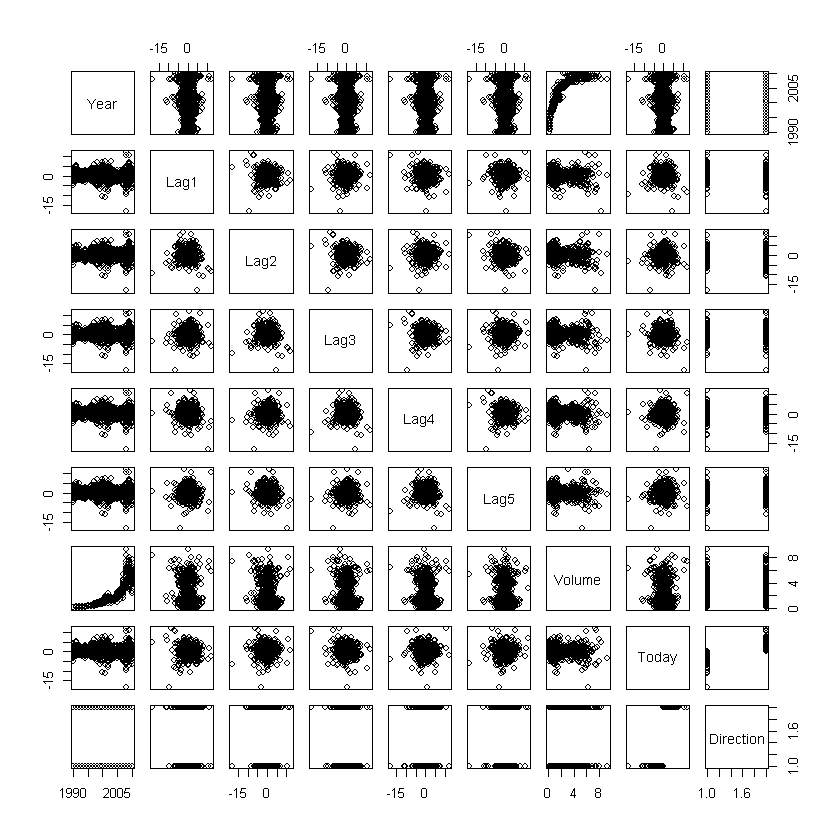

In [21]:
pairs(Weekly)

In [22]:
cor(Weekly[1:8])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


There doesn't seem to be significant correlation between variables except for the pair volume and year which has a correlation of 0.8419. 

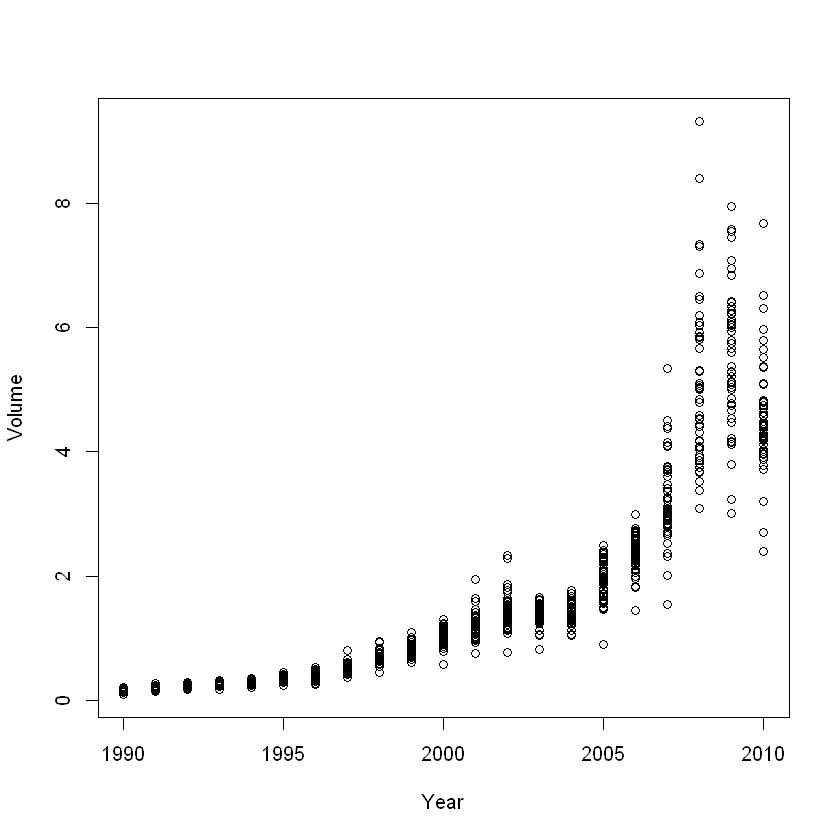

In [23]:
plot(Weekly$Year, Weekly$Volume, xlab = "Year", ylab= "Volume")

We can observe as time passes, the volume shows an increasing trend, especially after year 2005.

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [27]:
glm.fits = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family= binomial)
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Observing the p-values for each variables, Lag2 is the only variable that has a significant p-value.

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [32]:
glm.probs = predict(glm.fits, type ='response')
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.6086249 0.6010314 0.5875699 0.4816416 0.6169013 0.5684190 0.5786097 0.5151972 
        9        10 
0.5715200 0.5554287

In [60]:
attach(Weekly)
contrasts(Direction)
glm.pred=rep("Down", length(glm.probs))
glm.pred[glm.probs>0.5] = "UP"
confusion_table = table(glm.pred,Direction)

The following objects are masked from Weekly (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 8):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 9):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 10):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following o

,Up
Down,0
Up,1


In [78]:
confusion_table
accuracy = (confusion_table[1,1]+confusion_table[2,2])/length(Direction)
fpr = confusion_table[1,2] / (confusion_table[1,1] + confusion_table[1,2])
tpr = confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])
accuracy
fpr 
tpr

        Direction
glm.pred Down  Up
    Down   54  48
    UP    430 557

[1] 0.5610652

[1] 0.4705882

[1] 0.5643364

First, with threshold 0.5, the accuracy of the predictions is 56%. <br>
Next, the false positive rate, the percentage of getting the up directions when it is actually down, is 47%.<br>
Lastly, the true positive rate, getting the correct up days when it is actually up, is 56%.

(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [186]:
train = Year <=2008
Weekly.2008 = Weekly[train,]
Direction.2008 = Direction[train]
Weekly.2009 = Weekly[!train,]
Direction.2009 = Direction[!train]

glm.fit= glm(Direction~Lag2, data= Weekly, family = binomial, subset= train)
glm.prob = predict(glm.fit,Weekly.2009, type ='response')

contrasts(Direction)
glm.pred=rep("Down", length(glm.prob))
glm.pred[glm.prob>0.5] = "Up"
confusion_table = table(glm.pred, Direction.2009)
confusion_table
(confusion_table[1,1]+confusion_table[2,2])/length(Direction.2009)
confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])

,Up
Down,0
Up,1


        Direction.2009
glm.pred Down Up
    Down    9  5
    Up     34 56

[1] 0.625

[1] 0.6222222

(e) Repeat (d) using LDA.

In [187]:
lda.fit = lda(Direction~Lag2, data = Weekly, subset = train)
lda.pred = predict(lda.fit, Weekly.2009, type = "response")

contrasts(Direction)
confusion_table = table(lda.pred$class, Direction.2009)
confusion_table
(confusion_table[1,1]+confusion_table[2,2])/length(Direction.2009)
confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])

,Up
Down,0
Up,1


      Direction.2009
       Down Up
  Down    9  5
  Up     34 56

[1] 0.625

[1] 0.6222222

(f) Repeat (d) using QDA.

In [188]:
qda.fit = qda(Direction~Lag2, data = Weekly, subset = train)
qda.pred = predict(qda.fit, Weekly.2009, type = "response")

contrasts(Direction)
confusion_table = table(qda.pred$class, Direction.2009)
confusion_table
(confusion_table[1,1]+confusion_table[2,2])/length(Direction.2009)
confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])

,Up
Down,0
Up,1


      Direction.2009
       Down Up
  Down    0  0
  Up     43 61

[1] 0.5865385

[1] 0.5865385

(g) Repeat (d) using KNN with K = 1.

In [189]:
library(class)
train = Year <=2008
train.X = cbind(Lag2[train])
test.X = cbind(Lag2[!train])
train.direction = Direction[train]
set.seed(1)
knn.pred = knn(train.X, test.X, train.direction, k =1)
confusion_table = table(knn.pred, Direction[!train])
(confusion_table[1,1]+confusion_table[2,2])/length(Direction.2009)
confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])

[1] 0.5

[1] 0.5849057

(h) Which of these methods appears to provide the best results on
this data?

Comparing the accuracies, the logistic regression model and the linear discriminant model seems to provide the highest result with accuracy 0.625. and true positive ratio 0.6222.<br>
Comparing the ACU, the quadratic discriminant model is highest with 0.49.

Warning message:
"package 'pROC' is in use and will not be installed"Setting levels: control = Down, case = Up
Setting direction: controls > cases



Call:
roc.default(response = Direction.2009, predictor = glm.prob,     plot = T)

Data: glm.prob in 43 controls (Direction.2009 Down) > 61 cases (Direction.2009 Up).
Area under the curve: 0.4537

Setting levels: control = Down, case = Up
Setting direction: controls > cases



Call:
roc.default(response = Direction.2009, predictor = lda.pred$posterior[,     "Up"], plot = T)

Data: lda.pred$posterior[, "Up"] in 43 controls (Direction.2009 Down) > 61 cases (Direction.2009 Up).
Area under the curve: 0.4537

Setting levels: control = Down, case = Up
Setting direction: controls > cases



Call:
roc.default(response = Direction.2009, predictor = qda.pred$posterior[,     "Up"], plot = T)

Data: qda.pred$posterior[, "Up"] in 43 controls (Direction.2009 Down) > 61 cases (Direction.2009 Up).
Area under the curve: 0.4914

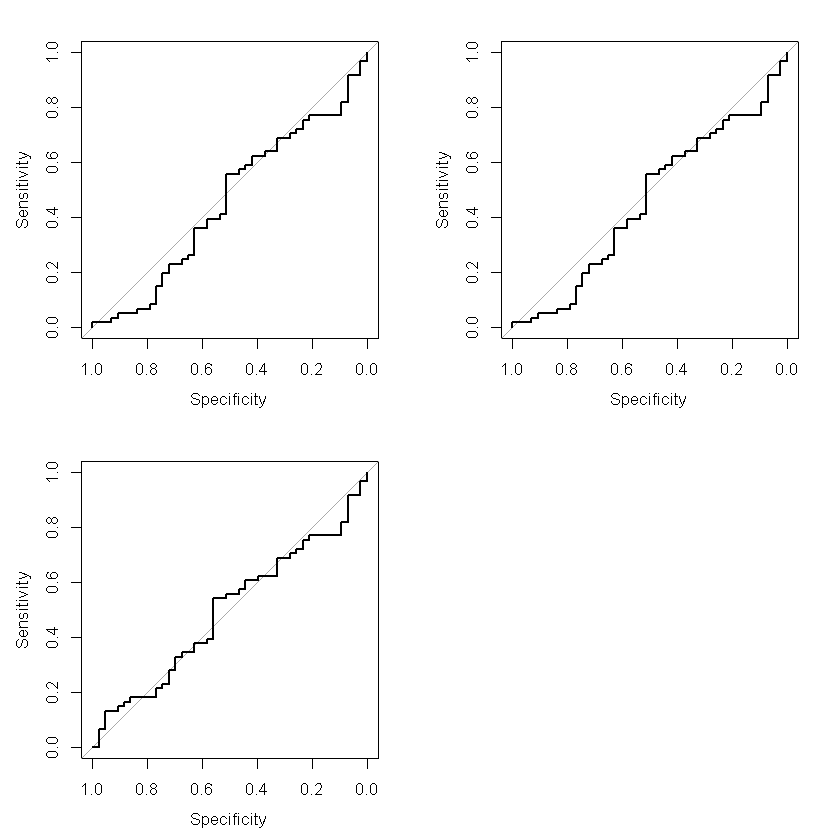

In [155]:
install.packages("pROC")
library(pROC)
par(mfrow = c(2, 2))
roc(Direction.2009,glm.prob,plot = T)
roc(Direction.2009,lda.pred$posterior[,"Up"],plot = T)
roc(Direction.2009,qda.pred$posterior[,"Up"],plot = T)

(i) Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [200]:
#changing the threshold from 0.5 to 0.55
glm.fit= glm(Direction~Lag2, data= Weekly, family = binomial, subset= train)
glm.prob = predict(glm.fit,Weekly.2009, type ='response')

contrasts(Direction)
glm.pred=rep("Down", length(glm.prob))
glm.pred[glm.prob>0.55] = "Up"
confusion_table = table(glm.pred, Direction.2009)
confusion_table
(confusion_table[1,1]+confusion_table[2,2])/length(Direction.2009)
confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])

,Up
Down,0
Up,1


        Direction.2009
glm.pred Down Up
    Down   20 24
    Up     23 37

[1] 0.5480769

[1] 0.6166667

In [285]:
#LDA fit with Lag2 and log of Lag2
lda.fit = lda(Direction~Lag2 + log(abs(Lag2)), data = Weekly, subset = train)
lda.pred = predict(lda.fit, Weekly.2009, type = "response")

contrasts(Direction)
confusion_table = table(lda.pred$class, Direction.2009)
confusion_table
(confusion_table[1,1]+confusion_table[2,2])/length(Direction.2009)
confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])

,Up
Down,0
Up,1


      Direction.2009
       Down Up
  Down    9  5
  Up     34 56

[1] 0.625

[1] 0.6222222

In [196]:
#QDA fit with Lag2 interaction with Volume
qda.fit = qda(Direction~Lag2:Volume, data = Weekly, subset = train)
qda.pred = predict(qda.fit, Weekly.2009, type = "response")

contrasts(Direction)
confusion_table = table(qda.pred$class, Direction.2009)
confusion_table
(confusion_table[1,1]+confusion_table[2,2])/length(Direction.2009)
confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])

,Up
Down,0
Up,1


      Direction.2009
       Down Up
  Down   24 28
  Up     19 33

[1] 0.5480769

[1] 0.6346154

In [197]:
#KNN with k = 7
library(class)
train = Year <=2008
train.X = cbind(Lag2[train])
test.X = cbind(Lag2[!train])
train.direction = Direction[train]
set.seed(1)
knn.pred = knn(train.X, test.X, train.direction, k =7)
confusion_table = table(knn.pred, Direction[!train])
(confusion_table[1,1]+confusion_table[2,2])/length(Direction.2009)
confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])

[1] 0.5384615

[1] 0.5942029

In [198]:
#KNN with k = 30
library(class)
train = Year <=2008
train.X = cbind(Lag2[train])
test.X = cbind(Lag2[!train])
train.direction = Direction[train]
set.seed(1)
knn.pred = knn(train.X, test.X, train.direction, k =30)
confusion_table = table(knn.pred, Direction[!train])
(confusion_table[1,1]+confusion_table[2,2])/length(Direction.2009)
confusion_table[2,2] / (confusion_table[2,1]+ confusion_table[2,2])

[1] 0.5480769

[1] 0.6166667

Quadratic Discriminant Analysis using Lag2 interaction with Volume came out with the highest TPR value till now. KNN also showed increase in accuracy and TPR with respect to bigger K values. Still, the logistic regression model and the linear discriminant model in the first part has the highest accuracy.

# Q.11

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.

In [209]:
data(Auto)
attach(Auto)
median(mpg)
mpg01 = rep(0, length(mpg))
mpg01[mpg>median(mpg)] = 1
Auto = data.frame(Auto, mpg01)
head(Auto,30)

The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 4):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 5):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 6):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 7):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year



[1] 22.75

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0
14,8,454,220,4354,9.0,70,1,chevrolet impala,0
14,8,440,215,4312,8.5,70,1,plymouth fury iii,0
14,8,455,225,4425,10.0,70,1,pontiac catalina,0
15,8,390,190,3850,8.5,70,1,amc ambassador dpl,0


(b) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

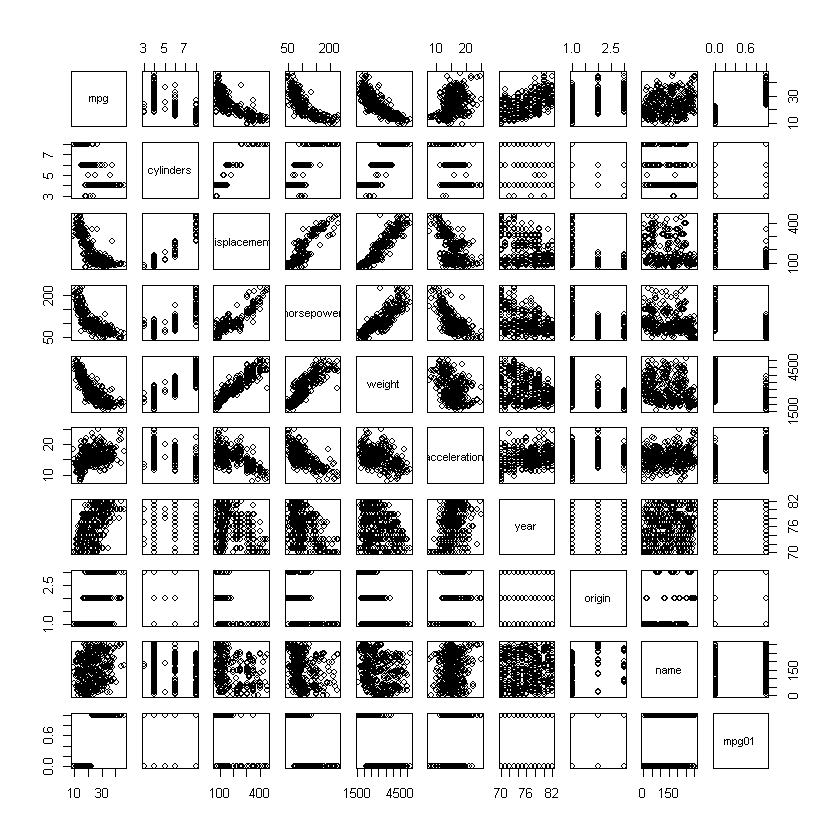

In [216]:
pairs(Auto)

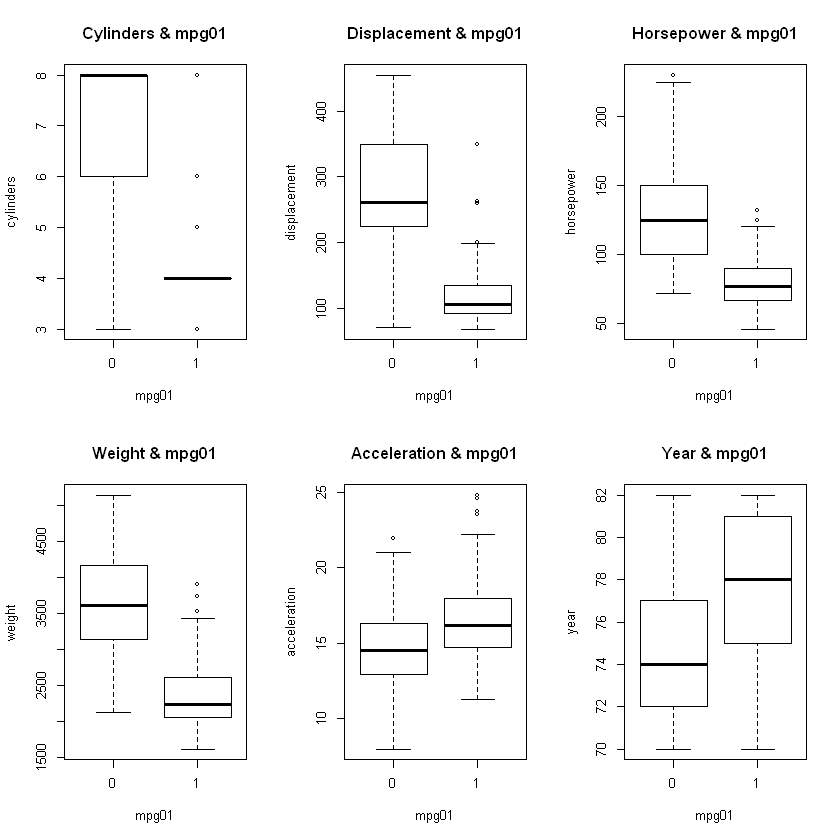

In [218]:
par(mfrow = c(2, 3))
boxplot(cylinders ~ mpg01, data = Auto, main = "Cylinders & mpg01")
boxplot(displacement ~ mpg01, data = Auto, main = "Displacement & mpg01")
boxplot(horsepower ~ mpg01, data = Auto, main = "Horsepower & mpg01")
boxplot(weight ~ mpg01, data = Auto, main = "Weight & mpg01")
boxplot(acceleration ~ mpg01, data = Auto, main = "Acceleration & mpg01")
boxplot(year ~ mpg01, data = Auto, main = "Year & mpg01")

Except for the variable "acceleration", all the other variables are showing associations with "mpg01". "Cylinder" seems to distinguish the values of mpg01 most efficiently since the boxplot are far away for the different classes of mpg01.

(c) Split the data into a training set and a test set.

In [276]:
train = (year %%3 !=0)
Auto.train = Auto[train,]
Auto.test = Auto[!train,]
dim(Auto)
dim(Auto.train)
dim(Auto.test)
mpg01.test = Auto.test$mpg01
length(mpg01.test)

[1] 392  10

[1] 270  10

[1] 122  10

[1] 122

(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [277]:
lda.fit = lda(mpg01~cylinders + displacement + horsepower + weight + year,
             data= Auto, subset=train)
lda.fit

Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight + 
    year, data = Auto, subset = train)

Prior probabilities of groups:
        0         1 
0.4925926 0.5074074 

Group means:
  cylinders displacement horsepower   weight     year
0  6.917293     285.1504  134.99248 3678.496 73.95489
1  4.167883     115.1752   78.41606 2322.212 77.41606

Coefficients of linear discriminants:
                      LD1
cylinders    -0.479506848
displacement -0.002100060
horsepower    0.011146816
weight       -0.001064244
year          0.124216390

Looking through the coefficients, it seems that the variables displacement, horsepower and weight have a minor impact on mpg01 so we remove those variables.

In [300]:
lda.fitted = lda(mpg01~cylinders + year, data= Auto, subset=train)
lda.fitted
Ida.prediction = predict(lda.fitted, Auto.test)
names(Ida.prediction)
table(Ida.prediction$class, mpg01.test)
mean(Ida.prediction$class == mpg01.test)
mean(Ida.prediction$class != mpg01.test)

Call:
lda(mpg01 ~ cylinders + year, data = Auto, subset = train)

Prior probabilities of groups:
        0         1 
0.4925926 0.5074074 

Group means:
  cylinders     year
0  6.917293 73.95489
1  4.167883 77.41606

Coefficients of linear discriminants:
                  LD1
cylinders -0.86502414
year       0.09831994

[1] "class"     "posterior" "x"

   mpg01.test
     0  1
  0 49  1
  1 14 58

[1] 0.8770492

[1] 0.1229508

Test error rate is 12.3%.

(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [301]:
qda.fitted = qda(mpg01~cylinders + year, data= Auto, subset=train)
qda.fitted
qda.prediction = predict(qda.fitted, Auto.test)
table(qda.prediction$class, mpg01.test)
mean(qda.prediction$class == mpg01.test)
mean(qda.prediction$class != mpg01.test)

Call:
qda(mpg01 ~ cylinders + year, data = Auto, subset = train)

Prior probabilities of groups:
        0         1 
0.4925926 0.5074074 

Group means:
  cylinders     year
0  6.917293 73.95489
1  4.167883 77.41606

   mpg01.test
     0  1
  0 52  5
  1 11 54

[1] 0.8688525

[1] 0.1311475

Error rate is 13.1%.

(f) Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [307]:
glm.fit= glm(mpg01~cylinders + year, data= Auto, family = binomial, subset= train)
glm.prob = predict(glm.fit, Auto.test, type ='response')

contrasts(Direction)
glm.pred=rep(0, length(glm.prob))
glm.pred[glm.prob>0.5] = 1
table(glm.pred, mpg01.test)
mean(glm.pred == mpg01.test)
mean(glm.pred!= mpg01.test)

,Up
Down,0
Up,1


        mpg01.test
glm.pred  0  1
       0 49  1
       1 14 58

[1] 0.8770492

[1] 0.1229508

The error rate is 12.3%.

(g) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [312]:
#KNN with k =1
train.X = cbind(cylinders, year)[train,]
test.X = cbind(cylinders, year)[!train,]
set.seed(1)
knn.pred = knn(train.X, test.X, Auto.train$mpg01, k =1)
table(knn.pred, mpg01.test)
mean(glm.pred == mpg01.test)
mean(glm.pred!= mpg01.test)

        mpg01.test
knn.pred  0  1
       0 49  1
       1 14 58

[1] 0.8770492

[1] 0.1229508

In [317]:
#KNN with k =50
train.X = cbind(cylinders, year)[train,]
test.X = cbind(cylinders, year)[!train,]
set.seed(1)
knn.pred = knn(train.X, test.X, Auto.train$mpg01, k =50)
table(knn.pred, mpg01.test)
mean(glm.pred == mpg01.test)
mean(glm.pred!= mpg01.test)

        mpg01.test
knn.pred  0  1
       0 49  0
       1 14 59

[1] 0.8770492

[1] 0.1229508

The error rate for KNN for various values of K is 12.3%.